In [27]:
# First, install dwave.
# Next, set up account with Leap.  Get API token.
# Run dwave setup, give it the API.
# Now you can use DWaveSampler and EmbeddingComposite
#
# -- Import stuff

from collections import defaultdict
from matplotlib import pyplot as plt
import networkx as nx
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

In [21]:
input_data = {(0,1):1,(1,2):1,(1,3):1,(0,0):-1,(1,1):-1,(2,2):-1}
# When the below line is uncommented, minimum energy should be -5.0
input_data[(3,3)] = -1

h = []
J = defaultdict(int)
T = nx.Graph()

In [22]:
print(input_data)


{(0, 1): 1, (1, 2): 1, (1, 3): 1, (0, 0): -1, (1, 1): -1, (2, 2): -1, (3, 3): -1}


J dictionary:   defaultdict(<class 'int'>, {(0, 1): 1, (1, 2): 1, (1, 3): 1})
h list:  [-1, -1, -1, -1]


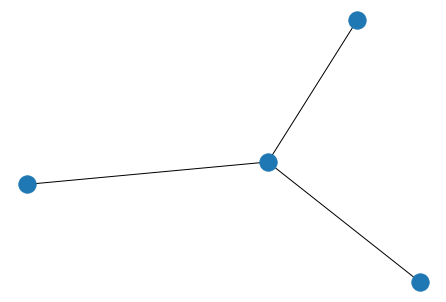

In [23]:
# Update J as a dictionary, not a matrix. Update h for each node, h is a list.
for item in input_data.items():
    if item[0][0] != item[0][1]:
        T.add_edge(item[0][0],item[0][1])
        J.update([item])
    elif item[0][0] == item[0][1]:
        h.append(item[1])

nx.draw(T)
print('J dictionary:  ', J)
print('h list: ',h)

In [24]:
# Set Chain Strength and number of shots:
chainstrength = 2
shots = 10


In [25]:
sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_ising(h, J,
                                chain_strength=chainstrength,
                                num_reads=shots)
energies = iter(response.data())



In [26]:
# -- Print that shinola right meow
print(response)

   0  1  2  3 energy num_oc. chain_.
0 +1 -1 +1 +1   -5.0      10     0.0
['SPIN', 1 rows, 10 samples, 4 variables]


In [ ]:
# If node(3) spin is missing, then the minimum energy 
# is returned as -4.0. The state is +-++.  
# 
# If node(3) spin is set to -1 as it should be, then
# the minimum energy state is still +-++, but the
# minimum energy eigenvalue is -5.0.
#
# This makes sense.  If nodes are sharing energy, then
# we should expect a leaf node to share less of its energy
# than an internal node. 
